In [53]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

# machine learning packages
from sklearn.model_selection import (train_test_split, cross_val_score, 
                                     StratifiedKFold, cross_validate,
                                     RandomizedSearchCV)
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.metrics import (classification_report, confusion_matrix, make_scorer, 
                             accuracy_score, precision_score, recall_score, f1_score)

warnings.filterwarnings('ignore')

# 🚨 Предсказание оттока игроков в онлайн-играх

## 📘 Описание датасета

Этот синтетический датасет моделирует поведение игроков в онлайн-игровой среде. Он включает как демографические характеристики, так и игровые метрики, отражающие активность и вовлечённость игроков.

### 📊 Признаки:

- **PlayerID** — уникальный идентификатор игрока  
- **Age** — возраст  
- **Gender** — пол  
- **Location** — регион проживания  
- **GameGenre** — жанр предпочитаемой игры  
- **PlayTimeHours** — среднее время игры за сессию (в часах)  
- **InGamePurchases** — наличие внутриигровых покупок (0 = Нет, 1 = Да)  
- **GameDifficulty** — уровень сложности игры  
- **SessionsPerWeek** — количество игровых сессий в неделю  
- **AvgSessionDurationMinutes** — средняя длительность сессии (в минутах)  
- **PlayerLevel** — уровень игрока  
- **AchievementsUnlocked** — количество полученных достижений  
- **EngagementLevel** — исходный уровень вовлечённости: `Low`, `Medium`, `High`

---

## 🎯 Цель проекта

Построить модель машинного обучения для **предсказания оттока игроков** (churn prediction).  

В данной задаче:
- Игрок с уровнем вовлечённости `Low` считается **оттокшим (churn)**
- Игрок с уровнем `Medium` или `High` считается **удержанным**

Таким образом, задача сведена к **бинарной классификации** с целевой переменной:
- `0` — отток (`Low`)
- `1` — не отток (`Medium`, `High`)

---

## ⚙️ Применение

- Своевременное выявление пользователей, склонных к уходу
- Настройка персонализированных предложений и бонусов
- Улучшение игровых механик и UX для удержания игроков
- Оптимизация маркетинговых стратегий и коммуникаций

---

## 📐 Метрика качества

Основная метрика — **F1-score** по классу `Churn`, поскольку важно:
- минимизировать **false negatives** (не заметили, что игрок уходит)
- сохранить **баланс между полнотой и точностью**

Дополнительно анализируются:
- **Confusion matrix**
- **Precision/Recall по каждому классу**
- **SHAP-анализ** ключевых признаков, влияющих на отток

---

## 📄 Источник

https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset/data

## Изучения данных

In [7]:
# Load dataset
df = pd.read_csv('/Users/sergejsilantev/Desktop/online_gaming_behavior_dataset.csv')

In [9]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [11]:
df.tail()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium
40033,49033,19,Male,USA,Sports,10.083804,0,Easy,13,84,72,39,Medium


In [13]:
df.sample(n=5)

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
11199,20199,21,Male,Europe,Strategy,5.265349,0,Medium,2,55,79,29,Low
943,9943,43,Male,USA,Action,23.023467,0,Hard,18,87,36,44,High
4334,13334,16,Male,Europe,Simulation,6.022946,0,Hard,8,11,84,38,Low
18392,27392,42,Female,USA,Sports,6.540836,0,Easy,1,89,24,30,Low
5599,14599,37,Male,USA,Simulation,16.497506,1,Medium,19,125,86,26,High


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

## Проверка и очистка данных

- **Проверка на пропущенные значения**: Найти пропущенные значения в датасете и выбрать стратегию обработки (например, удаление или заполнение).

- **Проверка на дубликаты**: Найти дублирующиеся строки и определить стратегию их обработки.

- **Проверка выбросов в числовых данных**: Обнаружить выбросы и провести дополнительный анализ.

- **Проверка на некорректные или несогласованные данные**: Убедиться, что категориальные значения корректны и единообразны.

- **Сводка и очистка**: Применить необходимые меры очистки и кратко описать получившийся чистый датасет.set.</li>

In [17]:
#  Обнаружение отсутствующих значений
df.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [19]:
# Идентифицировать дубликаты
df.duplicated().sum()

0

In [21]:
# Выявление отклонений для численных данных
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PlayerID,40034.0,29016.500000,11556.964675,9000.000000,19008.250000,29016.500000,39024.750000,49033.000000
Age,40034.0,31.992531,10.043227,15.000000,23.000000,32.000000,41.000000,49.000000
PlayTimeHours,40034.0,12.024365,6.914638,0.000115,6.067501,12.008002,17.963831,23.999592
InGamePurchases,40034.0,0.200854,0.400644,0.000000,0.000000,0.000000,0.000000,1.000000
SessionsPerWeek,40034.0,9.471774,5.763667,0.000000,4.000000,9.000000,14.000000,19.000000
AvgSessionDurationMinutes,40034.0,94.792252,49.011375,10.000000,52.000000,95.000000,137.000000,179.000000
PlayerLevel,40034.0,49.655568,28.588379,1.000000,25.000000,49.000000,74.000000,99.000000
AchievementsUnlocked,40034.0,24.526477,14.430726,0.000000,12.000000,25.000000,37.000000,49.000000


In [23]:
# Проверка несовместимых или недействительных данных с объектными типами
unique_gender = df['Gender'].unique()
unique_location = df['Location'].unique()
unique_gamegenre= df['GameGenre'].unique()
unique_ingamepurchases = df['InGamePurchases'].unique()
unique_gamedifficulty = df['GameDifficulty'].unique()
unique_engagementlevel = df['EngagementLevel'].unique()

print(unique_gender, unique_location, unique_gamegenre, unique_ingamepurchases,
      unique_gamedifficulty, unique_engagementlevel, sep='\n')

['Male' 'Female']
['Other' 'USA' 'Europe' 'Asia']
['Strategy' 'Sports' 'Action' 'RPG' 'Simulation']
[0 1]
['Medium' 'Easy' 'Hard']
['Medium' 'High' 'Low']


In [25]:
# Преобразовать столбцы в категории
Categorical_colums = ['Gender','Location','InGamePurchases',
                      'GameGenre','GameDifficulty','EngagementLevel']

for column in Categorical_colums:
    df[column] = df[column].astype('category')
    print(df[column].value_counts())
    print('')

# Установить переменные поля
numerical_fields = ['Age','PlayTimeHours','SessionsPerWeek',
                    'AvgSessionDurationMinutes','PlayerLevel','AchievementsUnlocked']
categorical_fields = ['Gender','Location','InGamePurchases',
                      'GameGenre','GameDifficulty','EngagementLevel']

Male      23959
Female    16075
Name: Gender, dtype: int64

USA       16000
Europe    12004
Asia       8095
Other      3935
Name: Location, dtype: int64

0    31993
1     8041
Name: InGamePurchases, dtype: int64

Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: GameGenre, dtype: int64

Easy      20015
Medium    12011
Hard       8008
Name: GameDifficulty, dtype: int64

Medium    19374
High      10336
Low       10324
Name: EngagementLevel, dtype: int64



# Exploratory Data Analysis

## Univariate analysis

## Описание признаков датасета

- **PlayerID**: Уникальный идентификатор игрока.
- **Age**: Возраст игрока.
- **Gender**: Пол игрока.
- **Location**: Географическое местоположение игрока.
- **GameGenre**: Жанр игры, в которую играет пользователь.
- **PlayTimeHours**: Среднее количество часов, проведённых за одной игровой сессией.
- **InGamePurchases**: Совершает ли игрок внутриигровые покупки (0 = Нет, 1 = Да).
- **GameDifficulty**: Уровень сложности игры.
- **SessionsPerWeek**: Количество игровых сессий в неделю.
- **AvgSessionDurationMinutes**: Средняя продолжительность одной игровой сессии (в минутах).
- **PlayerLevel**: Текущий уровень игрока в игре.
- **AchievementsUnlocked**: Количество достижений, разблокированных игроком.
- **EngagementLevel**: Категоризированный уровень вовлечённости, отражающий удержание игрока ('High', 'Medium', 'Low').

<Figure size 640x480 with 0 Axes>

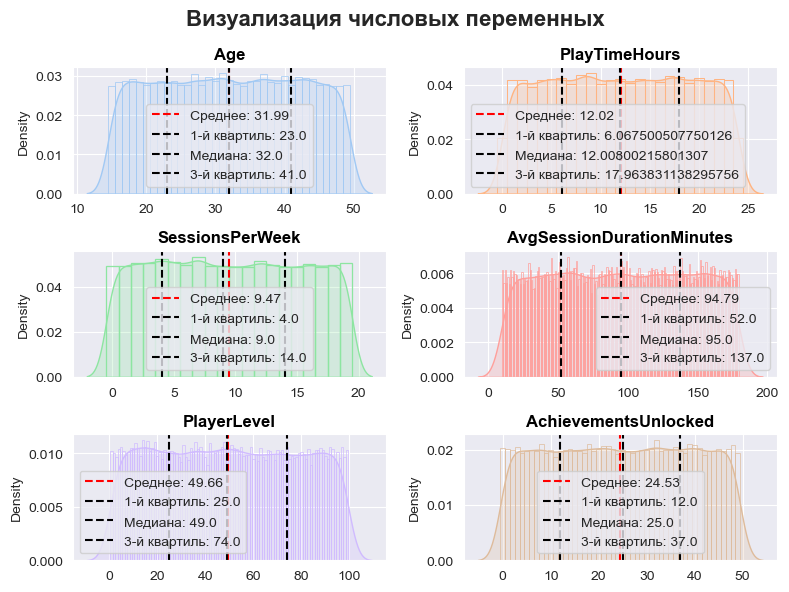

In [27]:
# Визуализация числовых переменных
plt.clf()

sns.set_style("darkgrid")
colors = sns.color_palette(palette='pastel', n_colors=len(numerical_fields))

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))
ax = ax.flat

# Добавим общий заголовок для всей фигуры
fig.suptitle('Визуализация числовых переменных', fontsize=16, fontweight='bold')

for i, col in enumerate(numerical_fields[:len(ax)]):
    mu = df[col].mean()
    q1, q2, q3 = df[col].quantile([0.25, 0.5, 0.75])
    
    sns.histplot(df, x=col, stat='density', fill=False, discrete=True,
                 color=colors[i], ax=ax[i])
    sns.kdeplot(df, x=col, color=colors[i], fill=True, ax=ax[i])
    
    ax[i].axvline(mu, linestyle='--', color='r', label=f"Среднее: {mu:.2f}")
    ax[i].axvline(q1, linestyle='--', color='black', label=f"1-й квартиль: {q1}")
    ax[i].axvline(q2, linestyle='--', color='black', label=f"Медиана: {q2}")
    ax[i].axvline(q3, linestyle='--', color='black', label=f"3-й квартиль: {q3}")
    
    ax[i].legend()
    ax[i].set_xlabel("")
    ax[i].set_title(f"{col}", fontweight='bold', color='black')

fig.tight_layout()
fig.show()

## Вывод по числовым признакам в контексте оттока

- **Возраст игроков** сосредоточен в диапазоне 23–41 года — ключевая возрастная группа для удержания.
- **Среднее время сессии (95 мин)** и **кол-во сессий в неделю (9–10)** указывают на высокую вовлечённость, но снижение этих показателей может сигнализировать об оттоке.
- **Количество достижений и уровень игрока** также отражают прогресс и интерес — низкие значения могут быть предикторами оттока.
- Распределения большинства признаков симметричны и хорошо масштабированы — это упрощает построение моделей.

> 📌 **Рекомендация**: при построении модели предсказания оттока стоит обратить внимание на изменения в частоте и длительности сессий, а также динамику достижений и уровня игрока.

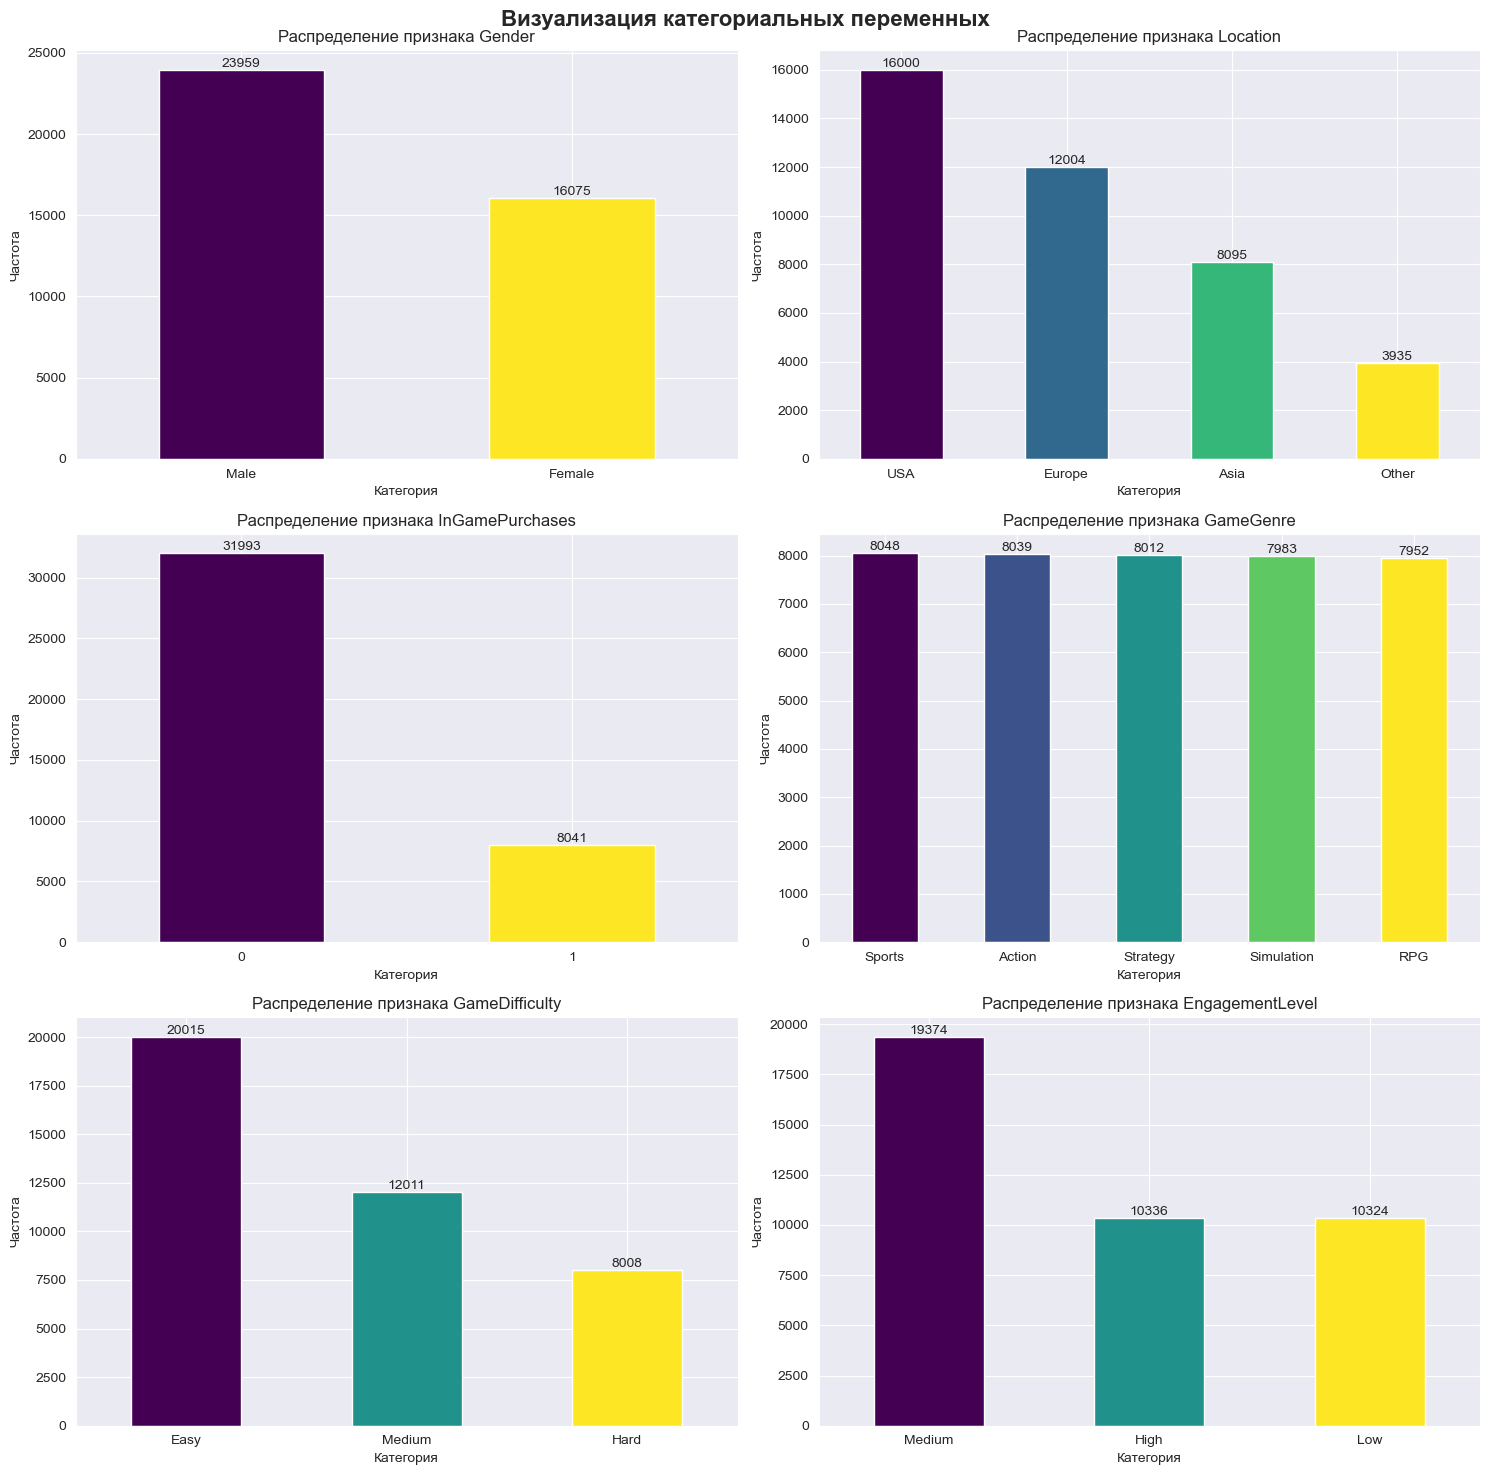

In [29]:
# Визуализация категориальных переменных
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
ax = ax.flat

# Добавим общий заголовок для всей фигуры
fig.suptitle('Визуализация категориальных переменных', fontsize=16, fontweight='bold')

# Построение графиков для категориальных признаков
for i, field in enumerate(categorical_fields):
    field = categorical_fields[i]
    counts = df[field].value_counts()

    # Создание цветовой карты
    colors = plt.cm.viridis(np.linspace(0, 1, len(counts)))
    
    # Построение столбчатой диаграммы с цветными столбцами
    counts.plot(kind='bar', ax=ax[i], color=colors)

    ax[i].set_title(f'Распределение признака {field}')
    ax[i].set_xlabel('Категория')
    ax[i].set_ylabel('Частота')
    ax[i].tick_params(axis='x', rotation=0)

    # Установка подписей категорий на оси X
    ax[i].set_xticks(range(len(counts.index)))
    ax[i].set_xticklabels(counts.index.tolist(), rotation=0)

    # Отображение значений на столбцах
    for j in range(len(counts)):
        ax[i].text(j, counts.iloc[j], counts.iloc[j], ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Вывод по категориальным признакам (в контексте оттока)

- **Пол (Gender)**: Мужчин существенно больше, чем женщин (≈60% vs 40%). Возможны поведенческие различия по полу, влияющие на отток.
- **Локация (Location)**: Основные регионы — США и Европа. География может влиять на предпочтения и вовлечённость.
- **Внутриигровые покупки (InGamePurchases)**: Лишь ~20% игроков совершают покупки. Эти пользователи могут быть более лояльными, и их отток особенно критичен.
- **Жанры игр (GameGenre)**: Популярность жанров довольно равномерна, но стоит проверить, какие жанры связаны с низкой вовлечённостью.
- **Сложность игры (GameDifficulty)**: Большинство предпочитает лёгкий уровень. Высокая сложность может быть фактором оттока у менее опытных игроков.
- **Уровень вовлечённости (EngagementLevel)**:
  - Большая часть пользователей — **Medium** (19 374).
  - Игроков с **низкой вовлечённостью (Low)** и **высокой (High)** примерно поровну (~10 300).
  - Это создаёт хорошую основу для бинарной/троичной классификации оттока.

> 🔍 **Рекомендация**: при анализе оттока учитывать пересечения — например, какие жанры или уровни сложности чаще встречаются у игроков с низкой вовлечённостью.

## Bivariate analysis

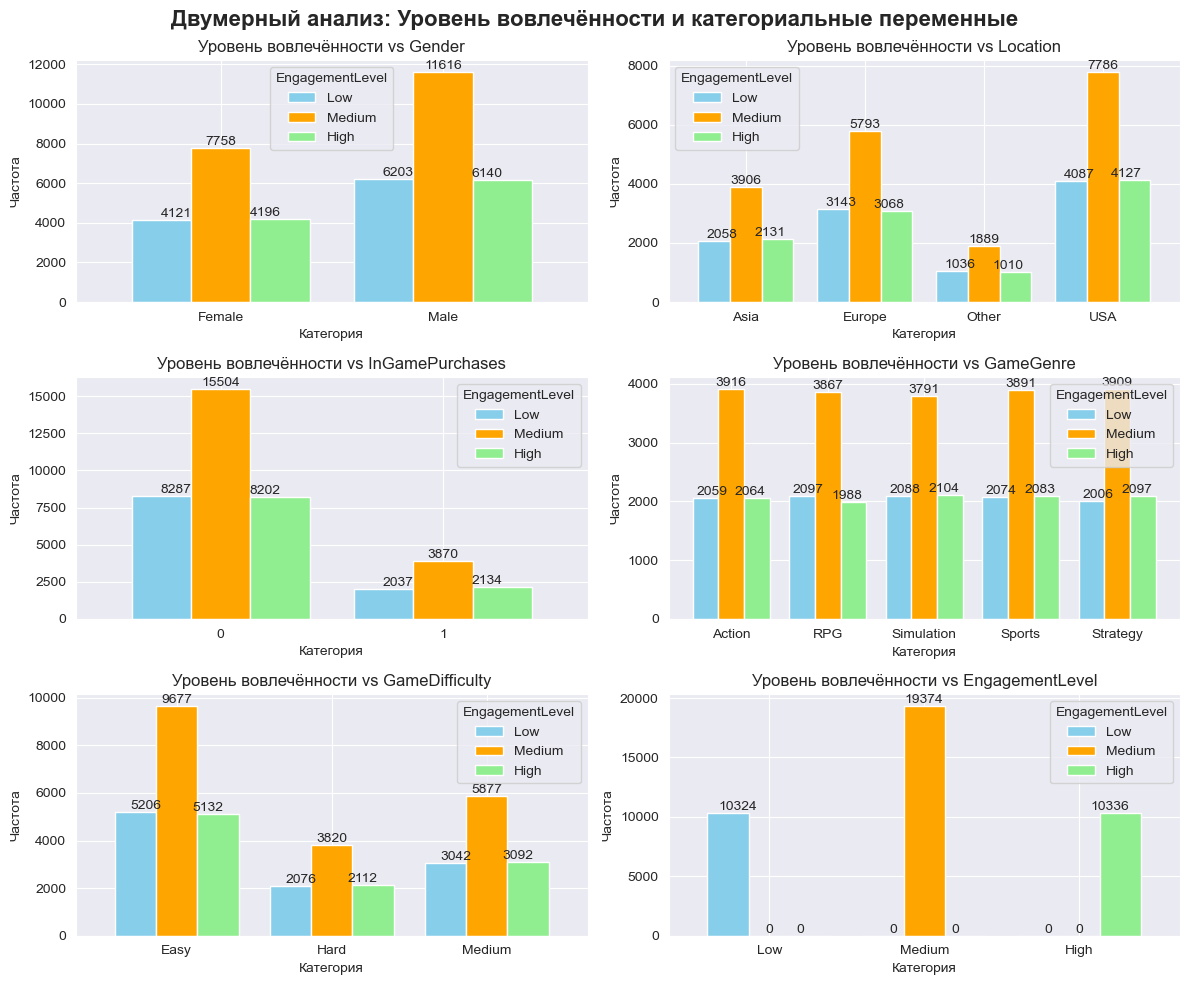

In [112]:
# Задаём желаемый порядок уровней вовлечённости
engagement_order = ['Low', 'Medium', 'High']

# Преобразуем 'EngagementLevel' в категориальный тип с заданным порядком
df['EngagementLevel'] = pd.Categorical(df['EngagementLevel'], categories=engagement_order, ordered=True)

# Создаём сетку подграфиков 3x2
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Преобразуем массив осей в одномерный для удобства перебора
axs = axs.flatten()

# Добавляем общий заголовок для всей фигуры
fig.suptitle('Двумерный анализ: Уровень вовлечённости и категориальные переменные', fontsize=16, fontweight='bold')

# Перебираем категориальные переменные и строим графики
for i, field in enumerate(categorical_fields):
    # Создаём кросс-таблицу: Категория vs Уровень вовлечённости
    counts = pd.crosstab(df[field], df['EngagementLevel'])
    
    # Строим столбчатую диаграмму со столбцами, стоящими рядом
    counts.plot(kind='bar', ax=axs[i], color=['skyblue', 'orange', 'lightgreen'], width=0.8)

    # Добавляем подписи и заголовки
    axs[i].set_title(f'Уровень вовлечённости vs {field}')
    axs[i].set_xlabel('Категория')
    axs[i].set_ylabel('Частота')

    # Устанавливаем подписи категорий на оси X
    axs[i].set_xticks(range(len(counts.index)))
    axs[i].set_xticklabels(counts.index.tolist(), rotation=0)

    # Подписываем значения на каждом столбце
    for j in range(len(counts)):
        for k in range(len(counts.columns)):
            axs[i].text(j + (k * 0.2) - 0.2, counts.iloc[j, k] + 0.1,
                        counts.iloc[j, k], ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Вывод по анализу вовлечённости и категориальных переменных

- **Пол (Gender)**:
  - У мужчин чуть выше доля высокой вовлечённости, чем у женщин.
  - Женщины чаще попадают в категории Low и Medium — возможный маркер риска оттока.

- **Локация (Location)**:
  - Игроки из США и Европы демонстрируют наибольшую вовлечённость.
  - В локациях "Asia" и "Other" доля Low-вовлечённости выше, что может указывать на культурные или языковые барьеры.

- **Внутриигровые покупки (InGamePurchases)**:
  - У игроков, **совершающих покупки**, заметно выше доля High-вовлечённости и ниже Low — это ценные пользователи, отток которых критичен.
  - Игроки без покупок чаще попадают в зону Low/Medium.

- **Жанр игры (GameGenre)**:
  - Все жанры имеют примерно одинаковое распределение вовлечённости, что говорит об отсутствии ярко выраженного влияния жанра на удержание.
  - Лёгкий перевес в сторону High-вовлечённости наблюдается у жанров Strategy и Simulation.

- **Сложность игры (GameDifficulty)**:
  - **Игры с лёгким уровнем** сложности привлекают больше пользователей с высокой вовлечённостью.
  - **Сложные игры** чаще ассоциированы с низкой вовлечённостью — возможная точка оттока у менее опытных игроков.

> 🔍 **Ключевые инсайты**:
> - Поведение по вовлечённости варьируется в зависимости от пола, локации и внутриигровых покупок.
> - Игровая сложность и покупки — потенциальные факторы риска оттока.
> - Эти признаки следует включить в модель предсказания оттока и использовать в персонализированных механиках удержания.

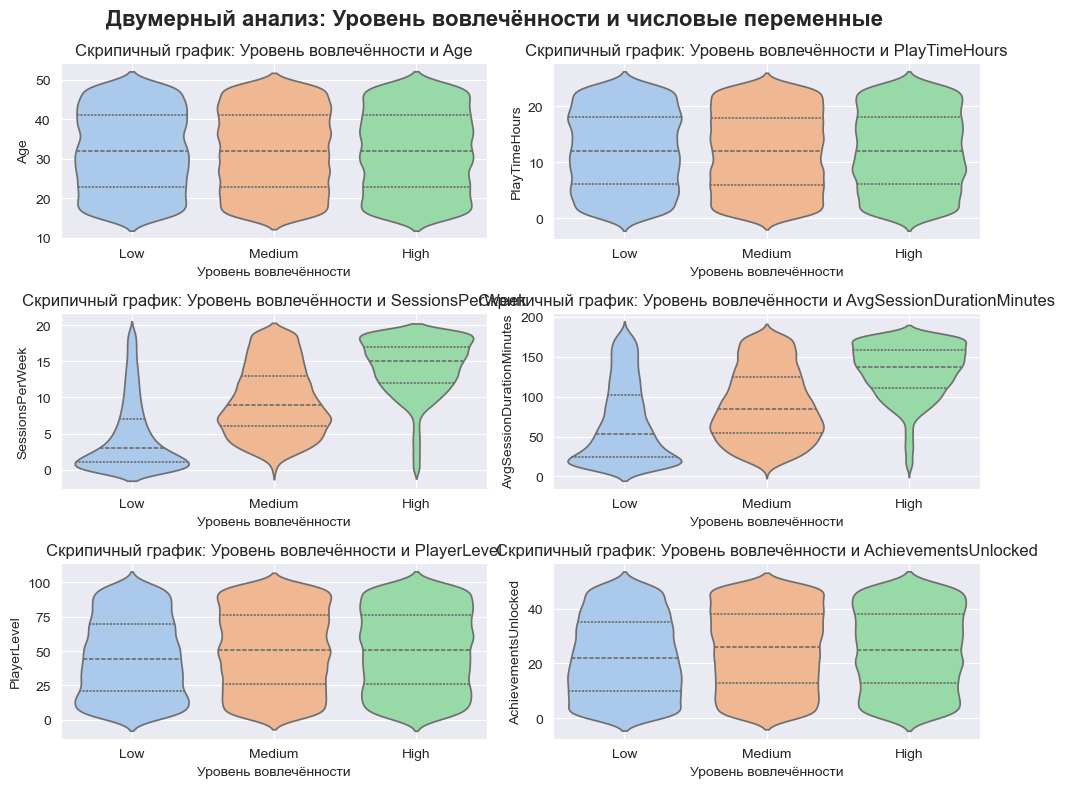

In [115]:
# Двумерные графики: Уровень вовлечённости vs числовые переменные

# Создаём сетку подграфиков (3 строки и 2 столбца)
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
ax = ax.flat  # Преобразуем массив осей в одномерный для удобства

# Добавляем общий заголовок для всей фигуры
fig.suptitle('Двумерный анализ: Уровень вовлечённости и числовые переменные',
             fontsize=16, fontweight='bold')

# Визуализация с помощью скрипичных графиков
for i in range(len(numerical_fields)):
    cat = numerical_fields[i]
    
    # Построение скрипичного графика (violin plot)
    sns.violinplot(x='EngagementLevel', y=cat,
                   data=df,
                   inner='quartile',
                   palette='pastel',
                   hue='EngagementLevel',
                   legend=False,
                   ax=ax[i])

    # Удаляем легенду, если она есть
    if ax[i].get_legend() is not None:
        ax[i].get_legend().remove()
    
    ax[i].set_title(f'Скрипичный график: Уровень вовлечённости и {cat}')
    ax[i].set_xlabel('Уровень вовлечённости')
    ax[i].set_ylabel(cat)
    ax[i].tick_params(axis='x', rotation=0)
    ax[i].grid(True)

# Удаляем лишние подграфики, если переменных меньше, чем ячеек в сетке
for j in range(len(numerical_fields), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

## Вывод по числовым признакам и вовлечённости (bivariate analysis)

- **Age (Возраст)**:
  - Возрастное распределение схожо для всех уровней вовлечённости.
  - Возраст не является сильным предиктором оттока.

- **PlayTimeHours (Время игры за сессию)**:
  - У пользователей с высокой вовлечённостью время игры выше и более стабильно.
  - Игроки с низкой вовлечённостью склонны играть реже и меньше по времени.

- **SessionsPerWeek (Сессии в неделю)**:
  - Явная зависимость: больше сессий — выше вовлечённость.
  - У Low-вовлечённых пик приходится на 1–3 сессии в неделю → важный признак оттока.

- **AvgSessionDurationMinutes (Средняя длительность сессии)**:
  - У игроков с высокой вовлечённостью сессии не только чаще, но и заметно длиннее.
  - У Low-группы выражено смещение к коротким сессиям → сильный маркер снижения интереса.

- **PlayerLevel (Уровень игрока)** и **AchievementsUnlocked (Достижения)**:
  - Более высокий уровень и больше достижений характерны для вовлечённых игроков.
  - Низкие значения по этим признакам — потенциальные индикаторы раннего оттока.

> ✅ **Ключевые признаки риска оттока**:
> - Низкое число сессий в неделю  
> - Короткая средняя длительность сессии  
> - Низкий прогресс (уровень/достижения)

📌 Эти переменные стоит использовать как базу для построения скоринговой модели churn prediction.

## Многомерный анализ

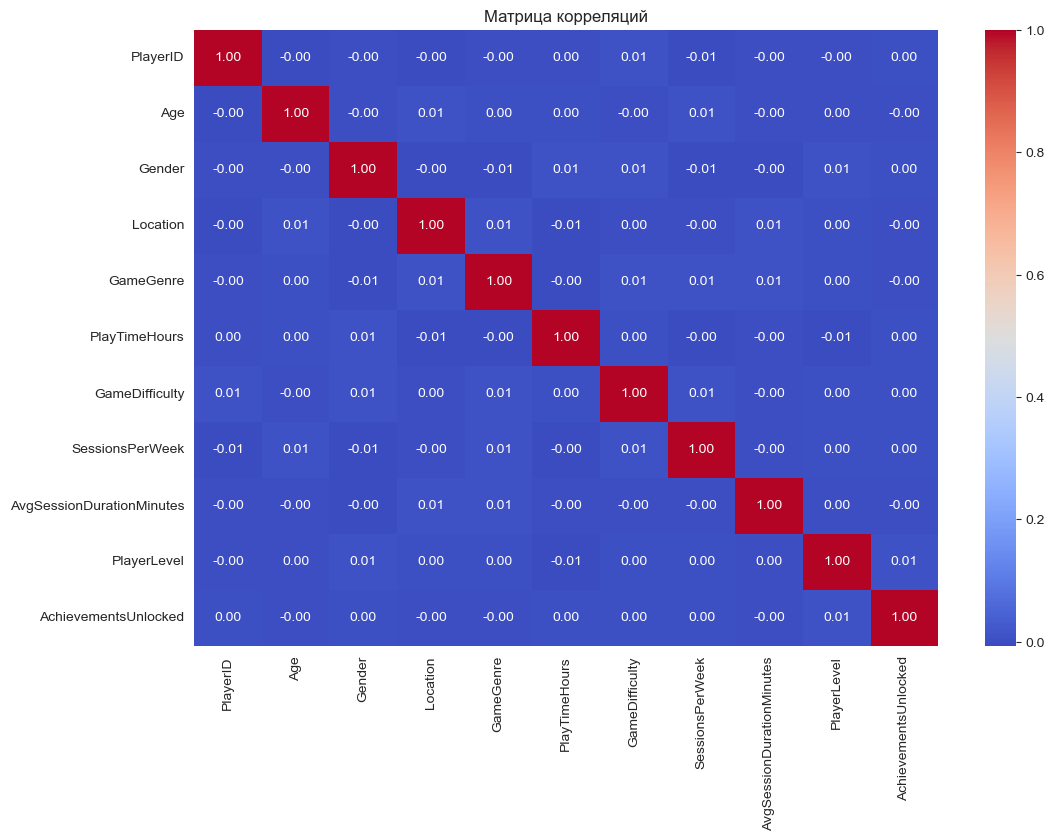

In [64]:
# Матрица корреляций

# Жёстко закодируем уровень вовлечённости
df['EngagementLevel'] = df['EngagementLevel'].replace({"Low": 0, "Medium": 1, "High": 2})

# Закодируем категориальные признаки числовыми значениями
label_encoders = {}
categorical_features = ['Gender', 'Location', 'GameGenre', 'GameDifficulty']

# Кодируем каждый категориальный признак с помощью LabelEncoder
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

# Построим матрицу корреляций
plt.figure(figsize=(12, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()


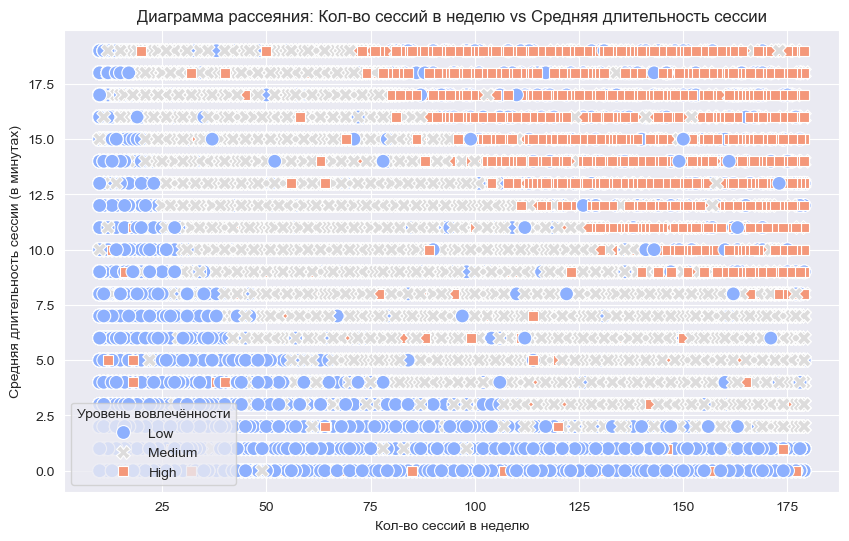

In [118]:
# Многомерный анализ по сильно коррелирующим признакам

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,
                x='AvgSessionDurationMinutes',
                y='SessionsPerWeek',
                hue='EngagementLevel',
                palette='coolwarm',
                style='EngagementLevel',
                s=100)

plt.title('Диаграмма рассеяния: Кол-во сессий в неделю vs Средняя длительность сессии')
plt.xlabel('Кол-во сессий в неделю')
plt.ylabel('Средняя длительность сессии (в минутах)')
plt.legend(title='Уровень вовлечённости')
plt.show()

## Вывод по диаграмме рассеяния: Сессии vs Длительность сессии

- **Пользователи с низкой вовлечённостью (0)** (синие круги) концентрируются в нижнем левом углу:
  - Мало сессий в неделю и короткие игровые сессии.
  - Это прямой маркер оттока — низкая активность по обеим осям.

- **Пользователи со средней вовлечённостью (1)** (серые крестики) рассредоточены по всему пространству:
  - Имеют широкое распределение как по количеству, так и по длительности.
  - Это основная "масса", возможные кандидаты как на рост вовлечённости, так и на отток.

- **Пользователи с высокой вовлечённостью (2)** (оранжевые квадраты):
  - Чётко тяготеют к верхнему правому углу: высокая частота и продолжительность сессий.
  - Такие пользователи устойчивы, их поведение — **эталон лояльности**.

> ✅ **Ключевой инсайт**:  
> Поведенческое ядро для удержания — **частые и длинные сессии**.  
> Поведение в зоне "мало и коротко" — основной предиктор оттока.

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   PlayerID                   40034 non-null  int64   
 1   Age                        40034 non-null  int64   
 2   Gender                     40034 non-null  category
 3   Location                   40034 non-null  category
 4   GameGenre                  40034 non-null  category
 5   PlayTimeHours              40034 non-null  float64 
 6   InGamePurchases            40034 non-null  category
 7   GameDifficulty             40034 non-null  category
 8   SessionsPerWeek            40034 non-null  int64   
 9   AvgSessionDurationMinutes  40034 non-null  int64   
 10  PlayerLevel                40034 non-null  int64   
 11  AchievementsUnlocked       40034 non-null  int64   
 12  EngagementLevel            40034 non-null  category
dtypes: category(6), float64(1), int

# Построение baseline-модели оттока игроков с Feature Engineering

### Включает создание новых признаков, кодирование, масштабирование и обучение Random Forest

In [32]:
df_fe = df.copy()

# Общее игровое время в неделю
df_fe['SessionsTotal'] = df_fe['SessionsPerWeek'] * df_fe['AvgSessionDurationMinutes']

# Категория частоты сессий
df_fe['SessionFrequencyCategory'] = pd.cut(df_fe['SessionsPerWeek'],
                                           bins=[-1, 3, 10, 20],
                                           labels=['LowFreq', 'MidFreq', 'HighFreq'])

# Флаг "хардкорного" игрока: играет часто и достиг высокого уровня
df_fe['IsHardcoreGamer'] = ((df_fe['SessionsPerWeek'] > 10) & (df_fe['PlayerLevel'] > 70)).astype(int)

# Эффективность прокачки (насколько быстро набирает достижения)
df_fe['ProgressRate'] = df_fe['AchievementsUnlocked'] / (df_fe['PlayerLevel'] + 1)  # +1 чтобы избежать деления на 0



In [34]:

df_encoded = df_fe.copy()
df_encoded['EngagementLevel'] = df_encoded['EngagementLevel'].map({'Low': 0, 'Medium': 1, 'High': 2})

cat_cols = df_encoded.select_dtypes(include='category').columns.tolist() + ['SessionFrequencyCategory']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

In [36]:

num_cols = ['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes',
            'PlayerLevel', 'AchievementsUnlocked', 'SessionsTotal',
            'ProgressRate']

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [38]:

# Разделяем на признаки и цель
X = df_encoded.drop(['PlayerID', 'EngagementLevel'], axis=1)
y = df_encoded['EngagementLevel']

# Тренировочный и тестовый сплит
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Обучение baseline-модели
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказания и отчёт
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2065
           1       0.92      0.95      0.94      3875
           2       0.93      0.89      0.91      2067

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.92      8007
weighted avg       0.92      0.92      0.92      8007



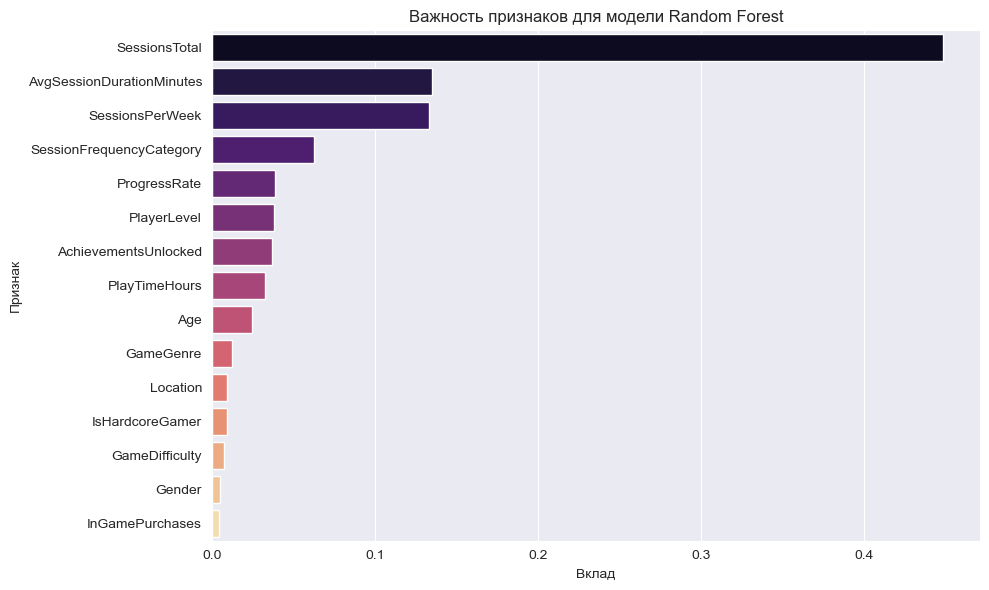

In [40]:

feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='magma')
plt.title('Важность признаков для модели Random Forest')
plt.xlabel('Вклад')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()

##  Вывод по важности признаков (Random Forest)

-  **Наиболее значимыми признаками** оказались:
  - `SessionsTotal` — общее игровое время в неделю — **ключевой индикатор вовлечённости**.
  - `AvgSessionDurationMinutes` и `SessionsPerWeek` — подтверждают, что **частота и длительность сессий напрямую связаны с удержанием**.
  - `SessionFrequencyCategory` также имеет вес — даже категориальное приближение частоты помогает модели.

-  **Признаки, отражающие прогресс игрока**, такие как `ProgressRate`, `PlayerLevel` и `AchievementsUnlocked`, тоже влияют, но в меньшей степени — игрок может играть долго, но не обязательно развиваться быстро.

-  **Наименее значимыми** оказались:
  - Демографические (`Age`, `Gender`, `Location`)
  - Игровые характеристики вроде `GameGenre` и `GameDifficulty`
  - `InGamePurchases` почти не повлияли на модель — **вовлечённость не всегда связана с монетизацией**.

> ✅ **Вывод**: поведенческие признаки (частота, длительность, суммарное время в игре) являются основными драйверами модели предсказания оттока.  
> Они должны быть в фокусе как при обучении модели, так и при построении стратегий удержания пользователей.

In [170]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  float64
 2   Gender                     40034 non-null  int64  
 3   Location                   40034 non-null  int64  
 4   GameGenre                  40034 non-null  int64  
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  int64  
 8   SessionsPerWeek            40034 non-null  float64
 9   AvgSessionDurationMinutes  40034 non-null  float64
 10  PlayerLevel                40034 non-null  float64
 11  AchievementsUnlocked       40034 non-null  float64
 12  EngagementLevel            40034 non-null  int64  
 13  SessionsTotal              40034 non-null  flo

# Data Splitting Training, Validation and Test Datasets and Preprocessing

In [42]:
# Удаляем неинформативный идентификатор и целевую переменную
X = df_encoded.drop(columns=['PlayerID', 'EngagementLevel'])
y = df_encoded['EngagementLevel']


# 80% — обучение, 10% — валидация, 10% — тест
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Проверим размеры выборок
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Масштабируем все числовые признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



Training set shape: (32027, 15) (32027,)
Validation set shape: (4003, 15) (4003,)
Test set shape: (4004, 15) (4004,)


# Model Training with Hyperparameters

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 32027, number of used features: 15
[LightGBM] [Info] Start training from score -1.358672
[LightGBM] [Info] Start training from score -0.726062
[LightGBM] [Info] Start training from score -1.350203
Модель LightGBM обучена за 10.81 секунд.
LightGBM обучена с подобранными гиперпараметрами.


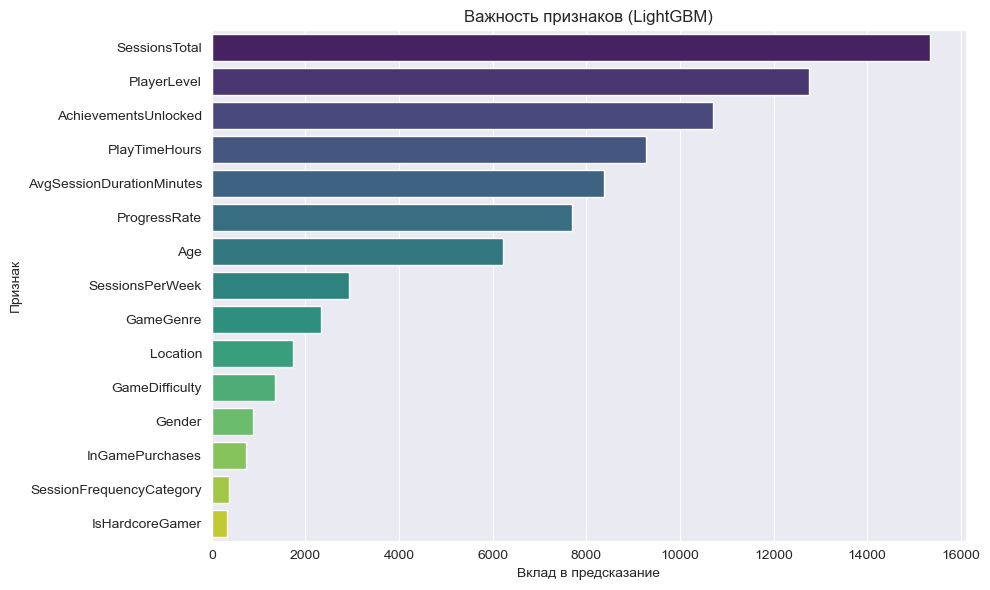

In [44]:
# Лучшие параметры, адаптированные под LightGBM
best_lgb_params = {
    'n_estimators': 900,
    'min_child_samples': 2,
    'num_leaves': 31,
    'max_depth': 7,
    'learning_rate': 0.01
}

# Пайплайн: масштабирование + LightGBM
lgb_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LGBMClassifier(**best_lgb_params, random_state=42))
])

# Засекаем время обучения
start_time = time.time()

# Обучение модели
lgb_pipeline.fit(X_train, y_train)

# Засекаем время окончания
end_time = time.time()
runtime = end_time - start_time

print(f"Модель LightGBM обучена за {runtime:.2f} секунд.")
print("LightGBM обучена с подобранными гиперпараметрами.")

# -----------------------------
#  Визуализация важности признаков
# -----------------------------
# Получаем обученную модель из пайплайна
lgb_model = lgb_pipeline.named_steps['classifier']

# Извлекаем важности признаков
importances = lgb_model.feature_importances_
feature_names = X_train.columns  # X_train должен быть DataFrame

# Создаём Series и сортируем
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='viridis')
plt.title('Важность признаков (LightGBM)')
plt.xlabel('Вклад в предсказание')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()

# Model Testing

In [58]:

# Предсказания на тестовой выборке
gb_y_pred = lgb_pipeline.predict(X_test)

# Основные метрики
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_f1 = f1_score(y_test, gb_y_pred, average='macro')  # можно заменить на 'binary' или 'weighted' при необходимости
gb_report = classification_report(y_test, gb_y_pred)
gb_confusion = confusion_matrix(y_test, gb_y_pred)

# Вывод результатов
print("\n🧪 Оценка модели LGBM Boosting:")
print(f"✅ Accuracy: {gb_accuracy:.4f}")
print(f"🎯 F1-score (macro): {gb_f1:.4f}")
print("\n📄 Classification Report:\n", gb_report)
print("🧩 Confusion Matrix:\n", gb_confusion)


🧪 Оценка модели LGBM Boosting:
✅ Accuracy: 0.9273
🎯 F1-score (macro): 0.9240

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      1045
           1       0.93      0.95      0.94      1912
           2       0.93      0.90      0.92      1047

    accuracy                           0.93      4004
   macro avg       0.93      0.92      0.92      4004
weighted avg       0.93      0.93      0.93      4004

🧩 Confusion Matrix:
 [[ 952   72   21]
 [  48 1819   45]
 [  32   73  942]]


##  Итоговая оценка модели LightGBM и рекомендации

### 📊 Результаты модели:

- **Accuracy**: 92.7%
- **Macro F1-score**: 0.924
- **Модель сбалансирована по всем классам**:
  - `Low` (отток): F1 = 0.92
  - `Medium`: F1 = 0.94
  - `High`: F1 = 0.92

- **Confusion Matrix** показывает низкое количество ошибок между классами, особенно по границе `Low/High`.

### 🔍 Важнейшие признаки по важности:

1. **SessionsTotal** – общее время в игре
2. **PlayerLevel** – уровень игрока
3. **AchievementsUnlocked** – количество достижений
4. **PlayTimeHours** – средняя продолжительность игровых сессий

Эти признаки отражают активность и вовлечённость игрока и критически важны для предсказания оттока.

---

### 💡 Рекомендации:

-  **Фокус на мониторинг активности игроков**: использовать показатели частоты и продолжительности сессий как ключевые триггеры риска оттока.
-  **Сегментировать игроков по уровню** и запускать персональные кампании для групп с низкой вовлечённостью.
-  **Интегрировать модель в real-time систему мониторинга**, чтобы оперативно реагировать на поведенческие паттерны, предшествующие оттоку.
-  **Дополнительно обучить модель на бинарную метку (churn)**, чтобы применять в бизнес-сценариях удержания.

